In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
"""Shows data before it is changed"""
data = pd.read_csv("Sleep_health_and_lifestyle_dataset_no_duplicates.csv")
print(data.to_string())

     Gender   Age   Occupation             Sleep Duration   Quality of Sleep   Physical Activity Level   Stress Level   BMI Category    Blood Pressure   Heart Rate   Daily Steps  Sleep Disorder
0    Male       27  Software Engineer                  6.1                  6                        42              6  Overweight      126/83                    77          4200            NaN
1    Male       28  Doctor                             6.2                  6                        60              8  Normal          125/80                    75         10000            NaN
2    Male       28  Sales Representative               5.9                  4                        30              8  Obese           140/90                    85          3000    Sleep Apnea
3    Male       28  Software Engineer                  5.9                  4                        30              8  Obese           140/90                    85          3000       Insomnia
4    Male       29  Teacher   

In [53]:
# Fjern mellemrum i kolonnenavne
data.columns = data.columns.str.strip()

# Fjern ekstra mellemrum i værdierne i 'BMI Category'
data['BMI Category'] = data['BMI Category'].str.strip()

In [54]:
"""BMI category ordinal encoding"""
weight_mapping = {
    'Underweight': 0,
    'Normal': 1,
    'Normal Weight': 1,
    'Overweight': 2,
    'Obese': 3
}
# Apply the mapping
data['Weight_Category_BMI'] = data['BMI Category'].map(weight_mapping)

In [55]:
# Map genders to numerical values
gender_mapping = {
    'Female': 0,
    'Male': 1
}

# Apply the mapping to the 'Gender' column
data['Gender_Numerical'] = data['Gender'].str.strip().map(gender_mapping)


In [56]:
# Scale the 'Physical Activity Level' column
data['Physical Activity Level (scaled)'] = 1 + (data['Physical Activity Level'] - 1) * (10 - 1) / (100 - 1)

In [57]:
# Scale the 'Heart Rate' column
data['Heart Rate (scaled)'] = 1 + (data['Heart Rate'] - 1) * (10 - 1) / (100 - 1)

In [58]:
# Scale the 'Daily Steps' column
data['Daily Steps (scaled)'] = 1 + (data['Daily Steps'] - 1) * (10 - 1) / (10000 - 1)

In [59]:
# Scale the 'Age' column
data['Age (scaled)'] = 1 + (data['Age'] - 1) * (10 - 1) / (100 - 1)

In [60]:
"""Binary stress 0 = not stressed 1 = stressed"""
# Define a binary encoding for 'Stress Level': 0 for not stressed (1-5), 1 for stressed (6-10)
#data['Stress_Binary'] = data['Stress Level'].apply(lambda x: 1 if 6 <= x <= 10 else 0)

'Binary stress 0 = not stressed 1 = stressed'

In [61]:
"""Remove columns which are not important"""
# Remove the 'User_ID and age' column
data = data.drop(columns=["Occupation", "Sleep Disorder", "Blood Pressure", "BMI Category", "Physical Activity Level", "Daily Steps", "Gender", "Heart Rate", "Age"])

In [62]:
"""Fjern # hvis du vil se hele datasættet"""
#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns

#from IPython.display import display
#display(data)

data.head(5)

,Sleep Duration,Quality of Sleep,Stress Level,Weight_Category_BMI,Gender_Numerical,Physical Activity Level (scaled),Heart Rate (scaled),Daily Steps (scaled),Age (scaled)
0,6.1,6,6,2,1,4.727273,7.909091,4.779478,3.363636
1,6.2,6,8,1,1,6.363636,7.727273,10.000000,3.454545
2,5.9,4,8,3,1,3.636364,8.636364,3.699370,3.454545
3,5.9,4,8,3,1,3.636364,8.636364,3.699370,3.454545
4,6.3,6,7,3,1,4.545455,8.363636,4.149415,3.545455


In [63]:
data.tail(5)

,Sleep Duration,Quality of Sleep,Stress Level,Weight_Category_BMI,Gender_Numerical,Physical Activity Level (scaled),Heart Rate (scaled),Daily Steps (scaled),Age (scaled)
127,8.0,9,3,2,0,7.727273,7.090909,7.29973,6.272727
128,8.1,9,3,2,0,7.727273,7.090909,7.29973,6.272727
129,8.2,9,3,2,0,7.727273,7.090909,7.29973,6.272727
130,8.0,9,3,2,0,7.727273,7.090909,7.29973,6.272727
131,8.1,9,3,2,0,7.727273,7.090909,7.29973,6.272727


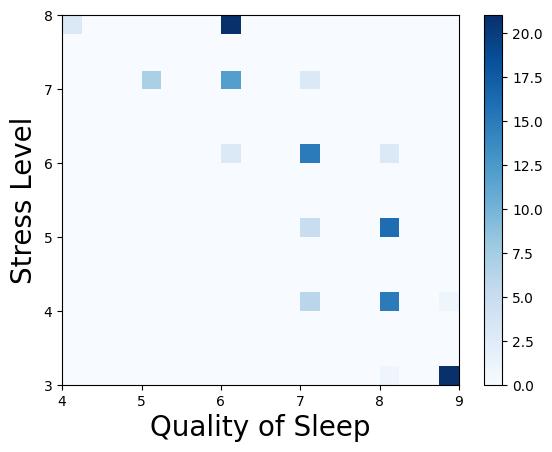

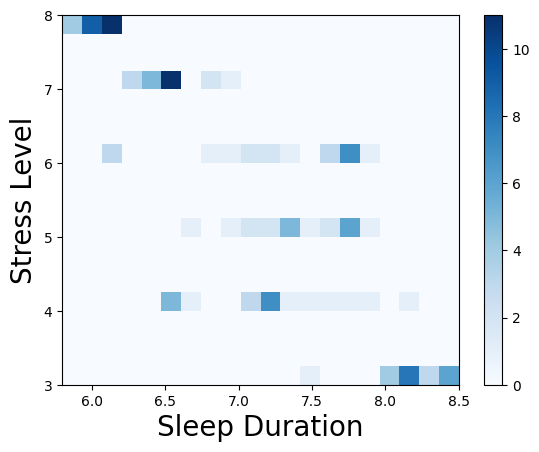

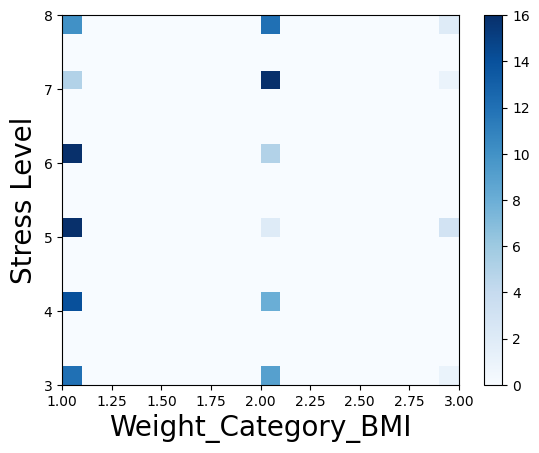

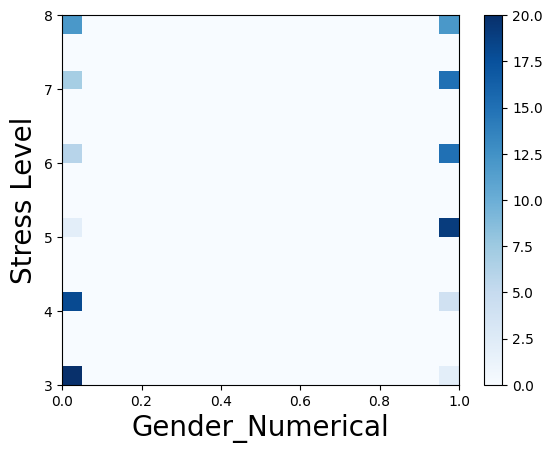

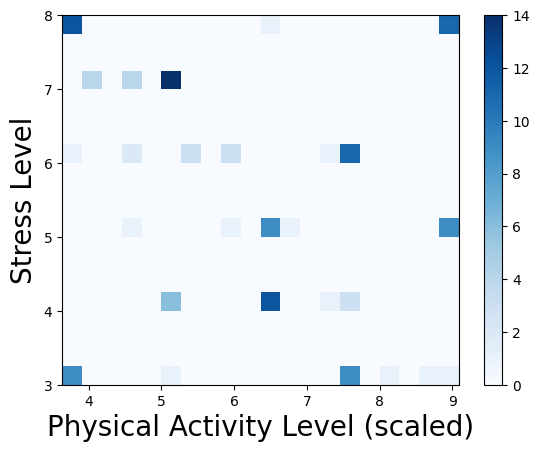

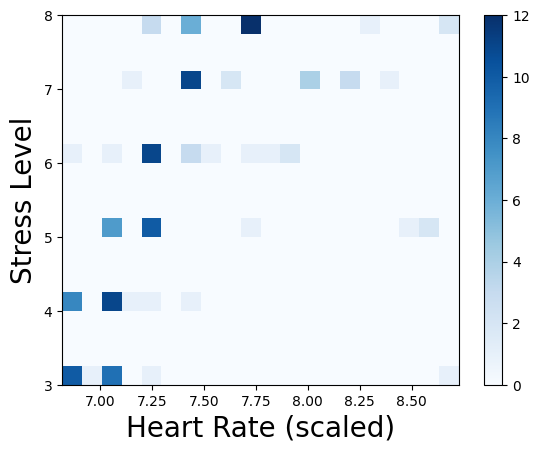

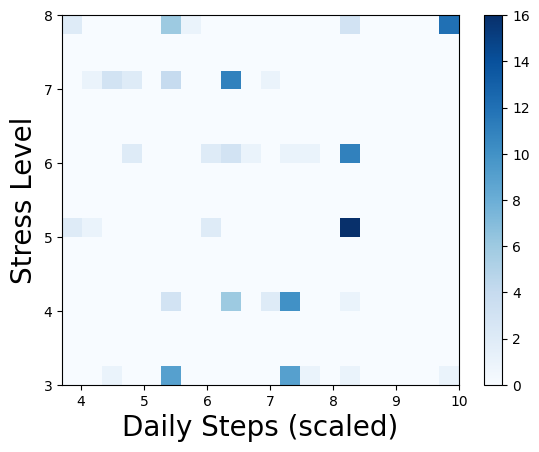

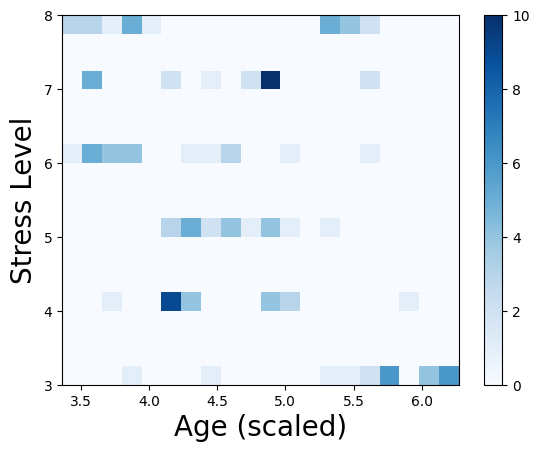

In [64]:
# 2D histogram
plt.hist2d(data["Quality of Sleep"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Quality of Sleep", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

plt.hist2d(data["Sleep Duration"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Sleep Duration", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

plt.hist2d(data["Weight_Category_BMI"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Weight_Category_BMI", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

plt.hist2d(data["Gender_Numerical"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Gender_Numerical", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

plt.hist2d(data["Physical Activity Level (scaled)"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Physical Activity Level (scaled)", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

plt.hist2d(data["Heart Rate (scaled)"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Heart Rate (scaled)", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

plt.hist2d(data["Daily Steps (scaled)"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Daily Steps (scaled)", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

plt.hist2d(data["Age (scaled)"], data["Stress Level"], bins=(20, 20), cmap='Blues')
plt.colorbar()
plt.xlabel("Age (scaled)", size=20)
plt.ylabel("Stress Level", size=20)
plt.show()

<Figure size 800x600 with 0 Axes>

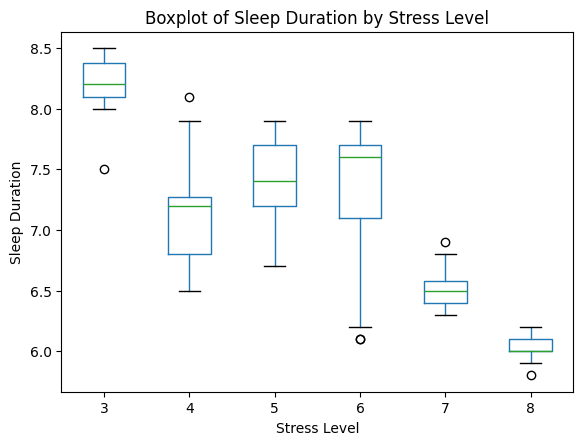

<Figure size 800x600 with 0 Axes>

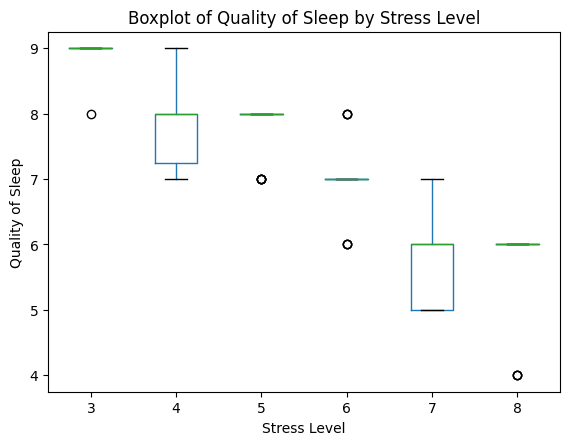

<Figure size 800x600 with 0 Axes>

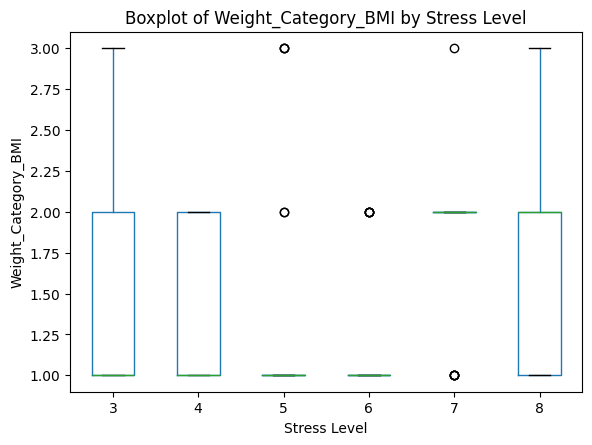

<Figure size 800x600 with 0 Axes>

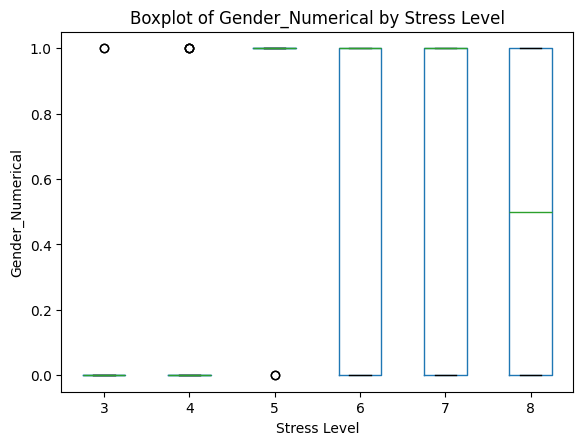

<Figure size 800x600 with 0 Axes>

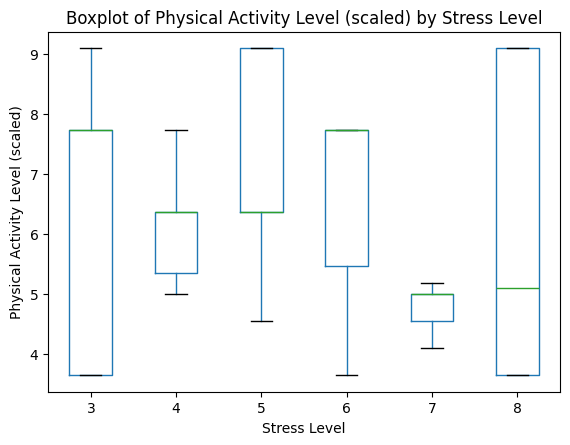

<Figure size 800x600 with 0 Axes>

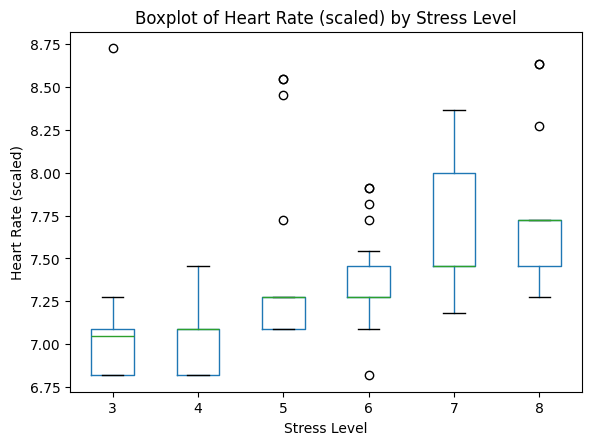

<Figure size 800x600 with 0 Axes>

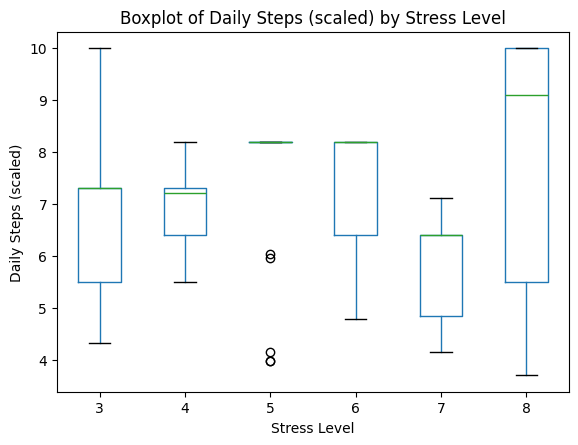

<Figure size 800x600 with 0 Axes>

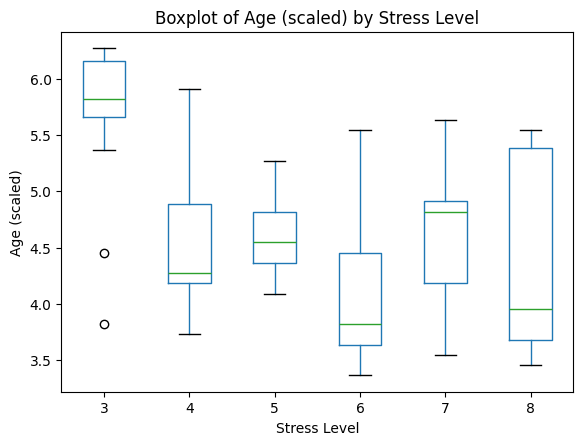

In [65]:
# Specify the target column and feature columns
target_column = "Stress Level"
feature_columns = [col for col in data.columns if col != target_column]

# Create boxplots for each feature against the target
for feature in feature_columns:
    plt.figure(figsize=(8, 6))
    data.boxplot(column=feature, by=target_column)
    plt.title(f"Boxplot of {feature} by {target_column}")
    plt.suptitle("")  # Remove the automatic title to keep it clean
    plt.xlabel(target_column)
    plt.ylabel(feature)
    plt.grid(False)
    plt.show()


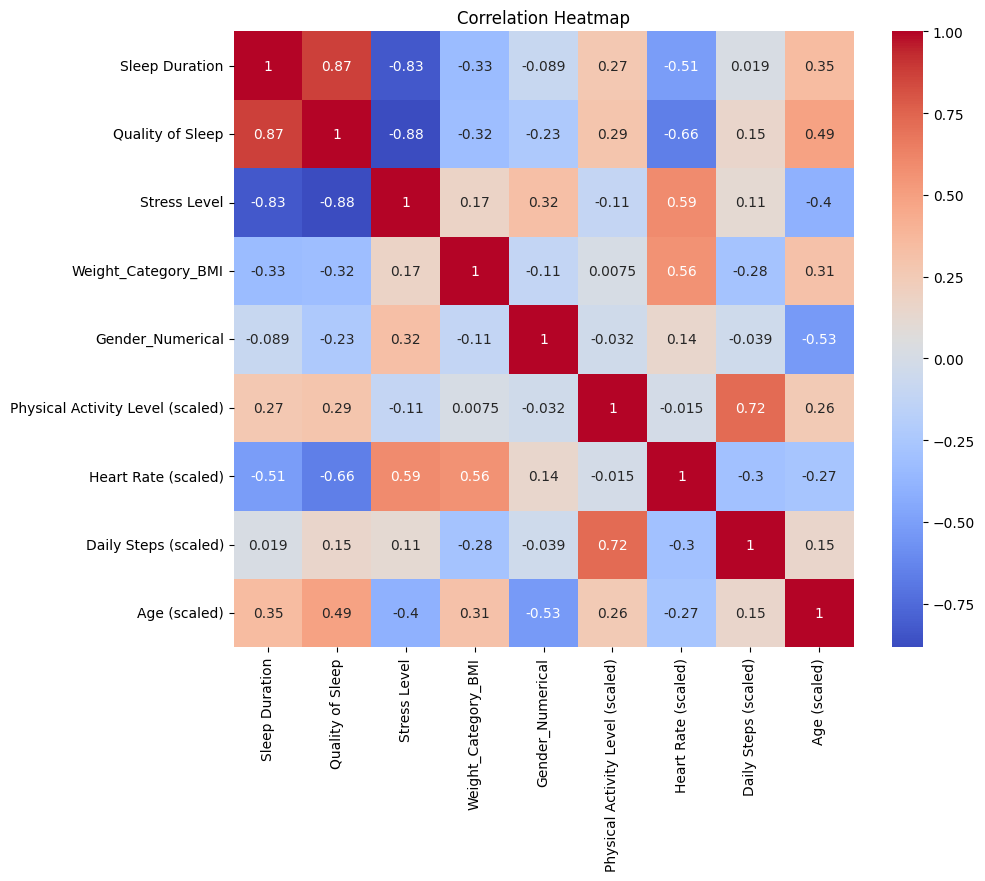

In [66]:
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

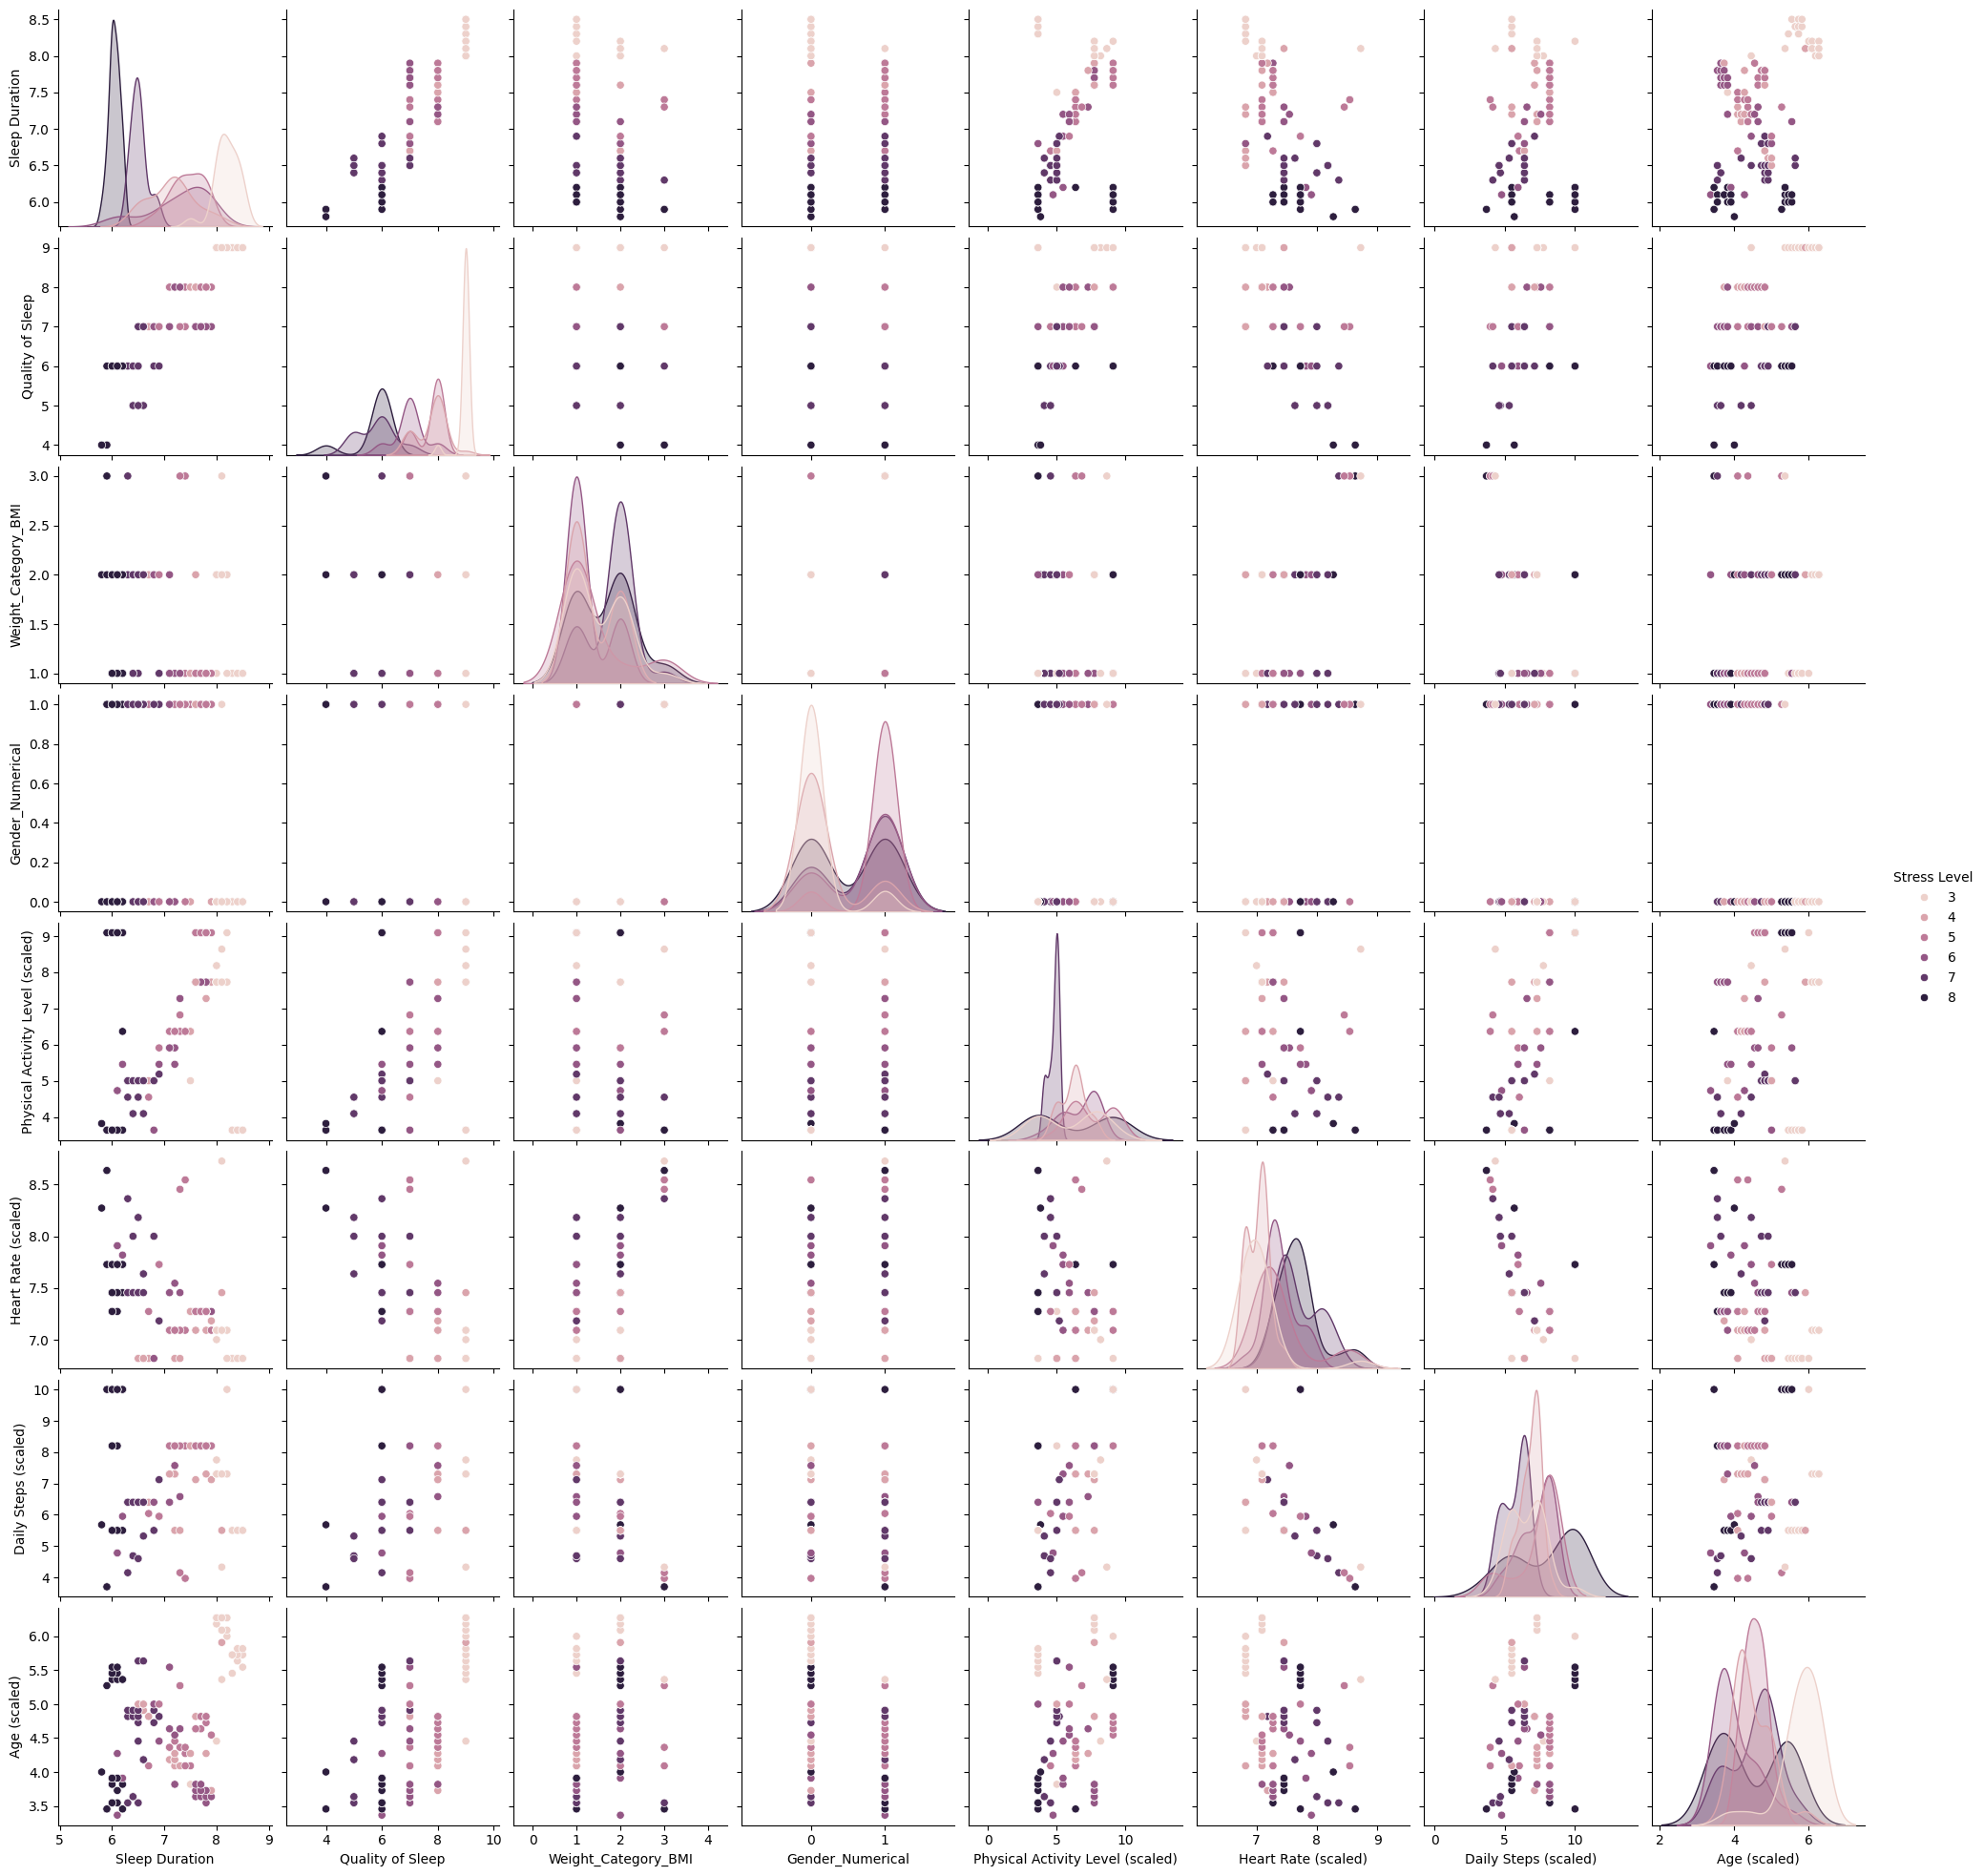

In [67]:
sns.pairplot(data, hue="Stress Level", diag_kind="kde", height=2.5)
plt.show()